# 1. Chargement des données
Reprise de la base du notebook `read_all_csv_preview` :

In [1]:

import pandas as pd
import os

DATA_DIR = '.'  # À adapter si besoin

csv_files = [
    'application_train.csv',
    'application_test.csv',
    'bureau.csv',
    'bureau_balance.csv',
    'credit_card_balance.csv',
    'installments_payments.csv',
    'POS_CASH_balance.csv',
    'previous_application.csv'
]

dfs = {}
for file in csv_files:
    path = os.path.join(DATA_DIR, file)
    if os.path.exists(path):
        dfs[file.replace('.csv', '')] = pd.read_csv(path)
        print(f'{file} chargé ({dfs[file.replace('.csv','')].shape[0]} lignes, {dfs[file.replace('.csv','')].shape[1]} colonnes)')
    else:
        print(f'ATTENTION : {file} non trouvé dans {DATA_DIR}')


application_train.csv chargé (307511 lignes, 122 colonnes)
application_test.csv chargé (48744 lignes, 121 colonnes)
bureau.csv chargé (1716428 lignes, 17 colonnes)
bureau_balance.csv chargé (27299925 lignes, 3 colonnes)
credit_card_balance.csv chargé (3840312 lignes, 23 colonnes)
installments_payments.csv chargé (13605401 lignes, 8 colonnes)
POS_CASH_balance.csv chargé (10001358 lignes, 8 colonnes)
previous_application.csv chargé (1670214 lignes, 37 colonnes)


> **Remarque sur l'exclusion de certains fichiers :**
>
> Deux fichiers présents dans le dossier ne sont **pas inclus dans l'EDA ni la préparation des données** :
>
> - `HomeCredit_columns_description.csv` : Ce fichier contient uniquement la description (glossaire) des variables du projet. Il n'apporte aucune donnée métier exploitable pour la création de features ou l'entraînement des modèles. Il sert uniquement de documentation pour comprendre le sens des colonnes.
>
> - `sample_submission.csv` : Ce fichier correspond à un exemple du format attendu pour la soumission finale des prédictions. Il ne contient aucune donnée d'entraînement ou d'information client utile pour l'analyse ou la modélisation. Il sera utilisé uniquement à l'étape finale pour formater les résultats du modèle avant envoi.
>
> **Conclusion :**  
> Seuls les fichiers de données métier (`application_train.csv`, `application_test.csv`, `bureau.csv`, `bureau_balance.csv`, `credit_card_balance.csv`, `installments_payments.csv`, `POS_CASH_balance.csv`, `previous_application.csv`) sont chargés et analysés pour l'EDA et la préparation des features.


# 2. Aperçu général des fichiers de données

In [2]:

for name, df in dfs.items():
    print(f"\n==> Aperçu de {name}:")
    display(df.head(3))
    print(df.info())
    print("-"*40)



==> Aperçu de application_train:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
----------------------------------------

==> Aperçu de application_test:


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None
----------------------------------------

==> Aperçu de bureau:


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None
----------------------------------------

==> Aperçu de bureau_balance:


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None
----------------------------------------

==> Aperçu de credit_card_balance:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None
----------------------------------------

==> Aperçu de POS_CASH_balance:


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None
----------------------------------------

==> Aperçu de previous_application:


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

# 3. Analyse de la variable cible `TARGET`

TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


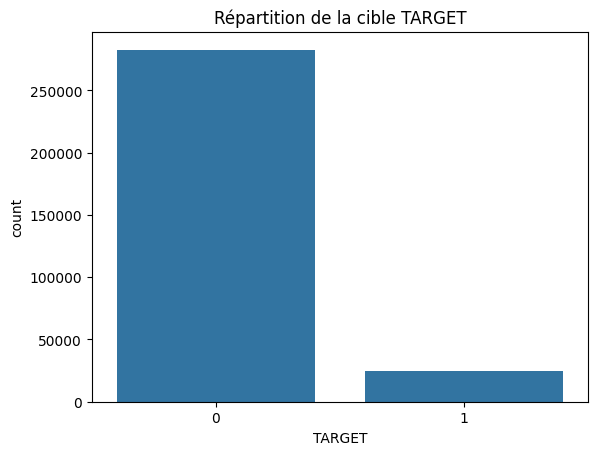

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

if 'application_train' in dfs and 'TARGET' in dfs['application_train'].columns:
    target = dfs['application_train']['TARGET']
    print(target.value_counts(normalize=True))
    sns.countplot(x=target)
    plt.title('Répartition de la cible TARGET')
    plt.show()


# 4. Analyse des valeurs manquantes


application_train : top 10 variables avec valeurs manquantes
COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
NONLIVINGAPARTMENTS_MEDI    0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_MODE       0.683550
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
dtype: float64


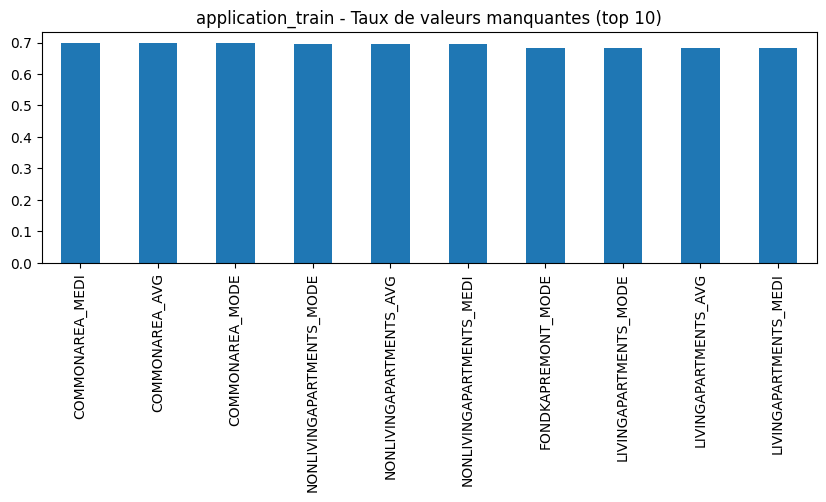


application_test : top 10 variables avec valeurs manquantes
COMMONAREA_AVG              0.687161
COMMONAREA_MODE             0.687161
COMMONAREA_MEDI             0.687161
NONLIVINGAPARTMENTS_AVG     0.684125
NONLIVINGAPARTMENTS_MODE    0.684125
NONLIVINGAPARTMENTS_MEDI    0.684125
FONDKAPREMONT_MODE          0.672842
LIVINGAPARTMENTS_AVG        0.672493
LIVINGAPARTMENTS_MODE       0.672493
LIVINGAPARTMENTS_MEDI       0.672493
dtype: float64


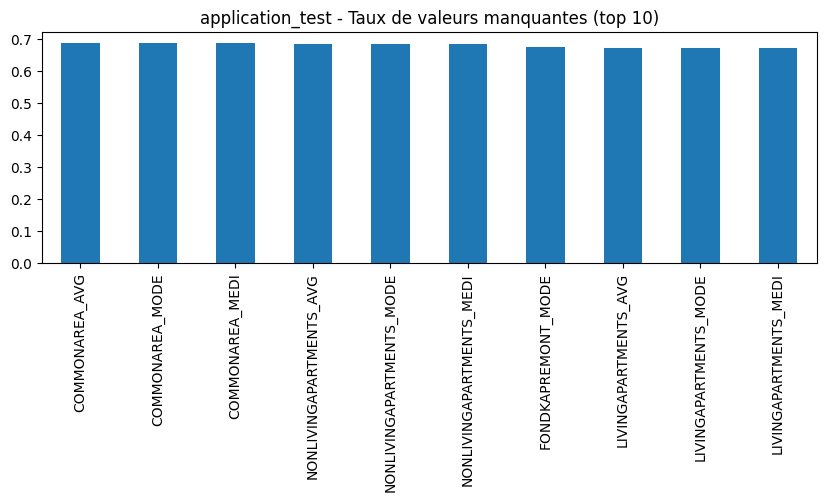


bureau : top 10 variables avec valeurs manquantes
AMT_ANNUITY               0.714735
AMT_CREDIT_MAX_OVERDUE    0.655133
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_DEBT       0.150119
DAYS_CREDIT_ENDDATE       0.061496
AMT_CREDIT_SUM            0.000008
dtype: float64


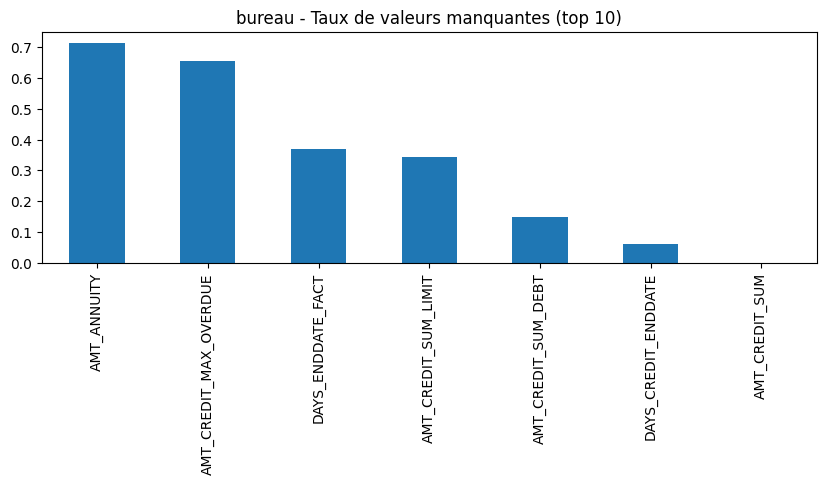


credit_card_balance : top 10 variables avec valeurs manquantes
AMT_PAYMENT_CURRENT           0.199981
AMT_DRAWINGS_ATM_CURRENT      0.195249
CNT_DRAWINGS_POS_CURRENT      0.195249
AMT_DRAWINGS_OTHER_CURRENT    0.195249
AMT_DRAWINGS_POS_CURRENT      0.195249
CNT_DRAWINGS_OTHER_CURRENT    0.195249
CNT_DRAWINGS_ATM_CURRENT      0.195249
CNT_INSTALMENT_MATURE_CUM     0.079482
AMT_INST_MIN_REGULARITY       0.079482
dtype: float64


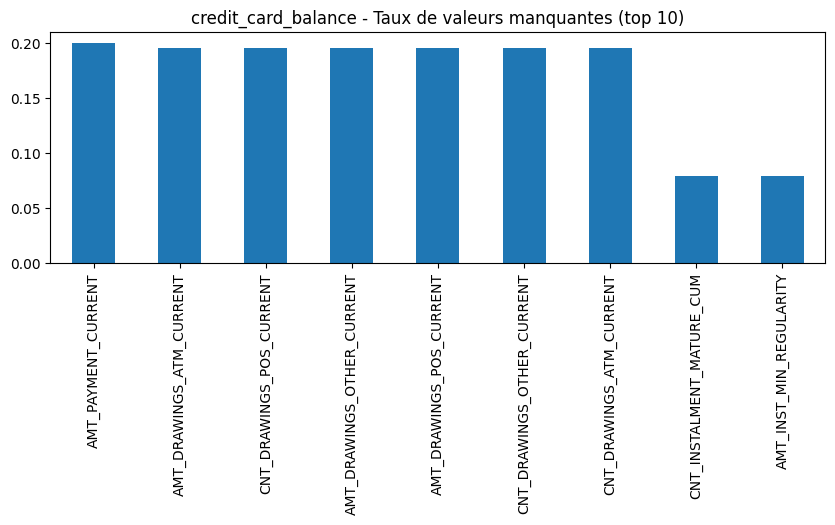


installments_payments : top 10 variables avec valeurs manquantes
DAYS_ENTRY_PAYMENT    0.000214
AMT_PAYMENT           0.000214
dtype: float64


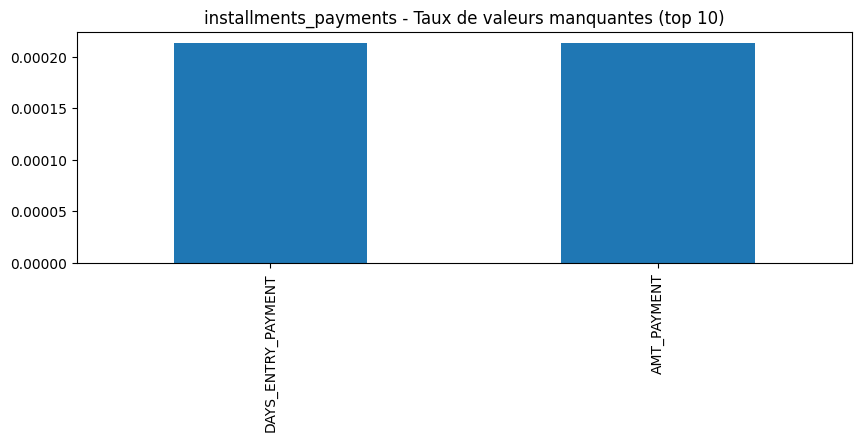


POS_CASH_balance : top 10 variables avec valeurs manquantes
CNT_INSTALMENT_FUTURE    0.002608
CNT_INSTALMENT           0.002607
dtype: float64


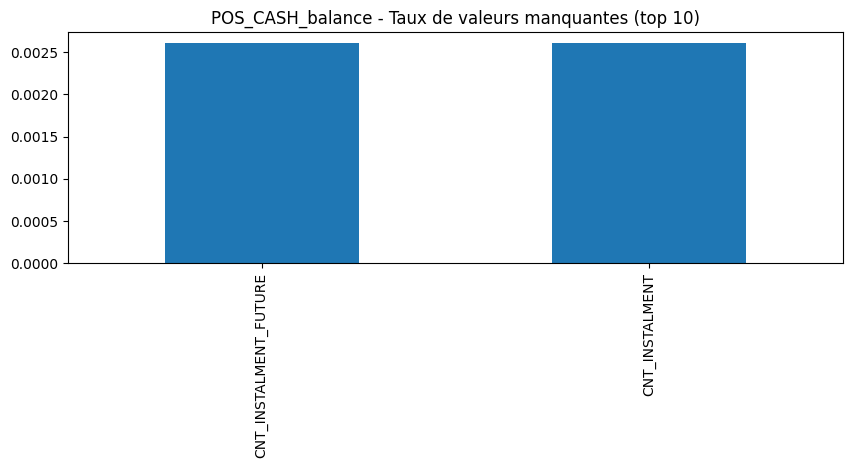


previous_application : top 10 variables avec valeurs manquantes
RATE_INTEREST_PRIVILEGED     0.996437
RATE_INTEREST_PRIMARY        0.996437
AMT_DOWN_PAYMENT             0.536365
RATE_DOWN_PAYMENT            0.536365
NAME_TYPE_SUITE              0.491198
NFLAG_INSURED_ON_APPROVAL    0.402981
DAYS_TERMINATION             0.402981
DAYS_LAST_DUE                0.402981
DAYS_LAST_DUE_1ST_VERSION    0.402981
DAYS_FIRST_DUE               0.402981
dtype: float64


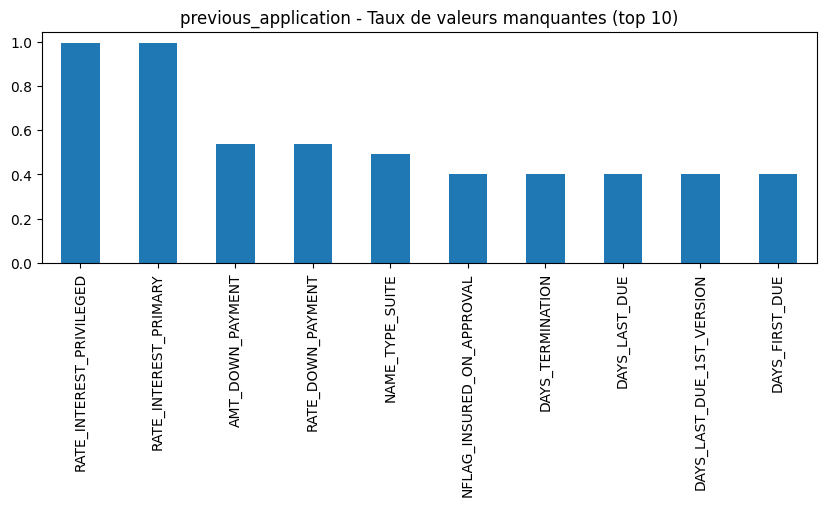

In [4]:

for name, df in dfs.items():
    missing = df.isnull().mean().sort_values(ascending=False)
    missing = missing[missing > 0]
    if not missing.empty:
        print(f"\n{name} : top 10 variables avec valeurs manquantes")
        print(missing.head(10))
        missing.head(10).plot.bar(figsize=(10,3), title=f"{name} - Taux de valeurs manquantes (top 10)")
        plt.show()


# 5. Statistiques descriptives des variables

In [5]:

for name, df in dfs.items():
    print(f"\nRésumé numérique : {name}")
    display(df.describe(include='all').transpose().head(10))



Résumé numérique : application_train


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,NaN,NaN,NaN,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,NaN,NaN,NaN,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,307511,3,F,202448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,307511,2,N,202924,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,307511,2,Y,213312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,307511.0,NaN,NaN,NaN,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,NaN,NaN,NaN,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,NaN,NaN,NaN,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,307499.0,NaN,NaN,NaN,27108.573909,14493.737315,1615.5,16524.0,24903.0,34596.0,258025.5



Résumé numérique : application_test


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,48744.0,NaN,NaN,NaN,277796.67635,103169.547296,100001.0,188557.75,277549.0,367555.5,456250.0
NAME_CONTRACT_TYPE,48744,2,Cash loans,48305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CODE_GENDER,48744,2,F,32678,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_CAR,48744,2,N,32311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG_OWN_REALTY,48744,2,Y,33658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,48744.0,NaN,NaN,NaN,0.397054,0.709047,0.0,0.0,0.0,1.0,20.0
AMT_INCOME_TOTAL,48744.0,NaN,NaN,NaN,178431.805855,101522.591536,26941.5,112500.0,157500.0,225000.0,4410000.0
AMT_CREDIT,48744.0,NaN,NaN,NaN,516740.435561,365397.004174,45000.0,260640.0,450000.0,675000.0,2245500.0
AMT_ANNUITY,48720.0,NaN,NaN,NaN,29426.240209,16016.368315,2295.0,17973.0,26199.0,37390.5,180576.0
AMT_GOODS_PRICE,48744.0,NaN,NaN,NaN,462618.840473,336710.21504,45000.0,225000.0,396000.0,630000.0,2245500.0



Résumé numérique : bureau


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_CURR,1716428.0,NaN,NaN,NaN,278214.933645,102938.558112,100001.0,188866.75,278055.0,367426.0,456255.0
SK_ID_BUREAU,1716428.0,NaN,NaN,NaN,5924434.489032,532265.728552,5000000.0,5463953.75,5926303.5,6385681.25,6843457.0
CREDIT_ACTIVE,1716428,4,Closed,1079273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CREDIT_CURRENCY,1716428,4,currency 1,1715020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_CREDIT,1716428.0,NaN,NaN,NaN,-1142.107685,795.164928,-2922.0,-1666.0,-987.0,-474.0,0.0
CREDIT_DAY_OVERDUE,1716428.0,NaN,NaN,NaN,0.818167,36.544428,0.0,0.0,0.0,0.0,2792.0
DAYS_CREDIT_ENDDATE,1610875.0,NaN,NaN,NaN,510.517362,4994.219837,-42060.0,-1138.0,-330.0,474.0,31199.0
DAYS_ENDDATE_FACT,1082775.0,NaN,NaN,NaN,-1017.437148,714.010626,-42023.0,-1489.0,-897.0,-425.0,0.0
AMT_CREDIT_MAX_OVERDUE,591940.0,NaN,NaN,NaN,3825.417661,206031.606207,0.0,0.0,0.0,0.0,115987185.0
CNT_CREDIT_PROLONG,1716428.0,NaN,NaN,NaN,0.00641,0.096224,0.0,0.0,0.0,0.0,9.0



Résumé numérique : bureau_balance


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_BUREAU,27299925.0,NaN,NaN,NaN,6036297.332974,492348.856904,5001709.0,5730933.0,6070821.0,6431951.0,6842888.0
MONTHS_BALANCE,27299925.0,NaN,NaN,NaN,-30.741687,23.864509,-96.0,-46.0,-25.0,-11.0,0.0
STATUS,27299925,8,C,13646993,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Résumé numérique : credit_card_balance


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_PREV,3840312.0,NaN,NaN,NaN,1904503.5899,536469.470563,1000018.0,1434385.0,1897122.0,2369327.75,2843496.0
SK_ID_CURR,3840312.0,NaN,NaN,NaN,278324.207289,102704.475133,100006.0,189517.0,278396.0,367580.0,456250.0
MONTHS_BALANCE,3840312.0,NaN,NaN,NaN,-34.521921,26.667751,-96.0,-55.0,-28.0,-11.0,-1.0
AMT_BALANCE,3840312.0,NaN,NaN,NaN,58300.155262,106307.031024,-420250.185,0.0,0.0,89046.68625,1505902.185
AMT_CREDIT_LIMIT_ACTUAL,3840312.0,NaN,NaN,NaN,153807.9574,165145.699525,0.0,45000.0,112500.0,180000.0,1350000.0
AMT_DRAWINGS_ATM_CURRENT,3090496.0,NaN,NaN,NaN,5961.324822,28225.688578,-6827.31,0.0,0.0,0.0,2115000.0
AMT_DRAWINGS_CURRENT,3840312.0,NaN,NaN,NaN,7433.388179,33846.077333,-6211.62,0.0,0.0,0.0,2287098.315
AMT_DRAWINGS_OTHER_CURRENT,3090496.0,NaN,NaN,NaN,288.169582,8201.989345,0.0,0.0,0.0,0.0,1529847.0
AMT_DRAWINGS_POS_CURRENT,3090496.0,NaN,NaN,NaN,2968.804848,20796.887047,0.0,0.0,0.0,0.0,2239274.16
AMT_INST_MIN_REGULARITY,3535076.0,NaN,NaN,NaN,3540.204129,5600.154122,0.0,0.0,0.0,6633.91125,202882.005



Résumé numérique : installments_payments


,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,13605401.0,1.903365e+06,536202.905546,1000001.0,1434191.000,1896520.000,2369094.000,2843499.000
SK_ID_CURR,13605401.0,2.784449e+05,102718.310411,100001.0,189639.000,278685.000,367530.000,456255.000
NUM_INSTALMENT_VERSION,13605401.0,8.566373e-01,1.035216,0.0,0.000,1.000,1.000,178.000
NUM_INSTALMENT_NUMBER,13605401.0,1.887090e+01,26.664067,1.0,4.000,8.000,19.000,277.000
DAYS_INSTALMENT,13605401.0,-1.042270e+03,800.946284,-2922.0,-1654.000,-818.000,-361.000,-1.000
DAYS_ENTRY_PAYMENT,13602496.0,-1.051114e+03,800.585883,-4921.0,-1662.000,-827.000,-370.000,-1.000
AMT_INSTALMENT,13605401.0,1.705091e+04,50570.254429,0.0,4226.085,8884.080,16710.210,3771487.845
AMT_PAYMENT,13602496.0,1.723822e+04,54735.783981,0.0,3398.265,8125.515,16108.425,3771487.845



Résumé numérique : POS_CASH_balance


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_PREV,10001358.0,NaN,NaN,NaN,1903216.598957,535846.530722,1000001.0,1434405.0,1896565.0,2368963.0,2843499.0
SK_ID_CURR,10001358.0,NaN,NaN,NaN,278403.863306,102763.74509,100001.0,189550.0,278654.0,367429.0,456255.0
MONTHS_BALANCE,10001358.0,NaN,NaN,NaN,-35.012588,26.06657,-96.0,-54.0,-28.0,-13.0,-1.0
CNT_INSTALMENT,9975287.0,NaN,NaN,NaN,17.08965,11.995056,1.0,10.0,12.0,24.0,92.0
CNT_INSTALMENT_FUTURE,9975271.0,NaN,NaN,NaN,10.48384,11.109058,0.0,3.0,7.0,14.0,85.0
NAME_CONTRACT_STATUS,10001358,9,Active,9151119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SK_DPD,10001358.0,NaN,NaN,NaN,11.606928,132.714043,0.0,0.0,0.0,0.0,4231.0
SK_DPD_DEF,10001358.0,NaN,NaN,NaN,0.654468,32.762491,0.0,0.0,0.0,0.0,3595.0



Résumé numérique : previous_application


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,NaN,NaN,NaN,1923089.135331,532597.958696,1000001.0,1461857.25,1923110.5,2384279.75,2845382.0
SK_ID_CURR,1670214.0,NaN,NaN,NaN,278357.174099,102814.823849,100001.0,189329.0,278714.5,367514.0,456255.0
NAME_CONTRACT_TYPE,1670214,4,Cash loans,747553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_ANNUITY,1297979.0,NaN,NaN,NaN,15955.120659,14782.137335,0.0,6321.78,11250.0,20658.42,418058.145
AMT_APPLICATION,1670214.0,NaN,NaN,NaN,175233.86036,292779.762386,0.0,18720.0,71046.0,180360.0,6905160.0
AMT_CREDIT,1670213.0,NaN,NaN,NaN,196114.021218,318574.616547,0.0,24160.5,80541.0,216418.5,6905160.0
AMT_DOWN_PAYMENT,774370.0,NaN,NaN,NaN,6697.402139,20921.49541,-0.9,0.0,1638.0,7740.0,3060045.0
AMT_GOODS_PRICE,1284699.0,NaN,NaN,NaN,227847.279283,315396.557937,0.0,50841.0,112320.0,234000.0,6905160.0
WEEKDAY_APPR_PROCESS_START,1670214,7,TUESDAY,255118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HOUR_APPR_PROCESS_START,1670214.0,NaN,NaN,NaN,12.484182,3.334028,0.0,10.0,12.0,15.0,23.0


# 6. Visualisation de quelques variables (numériques, catégorielles)

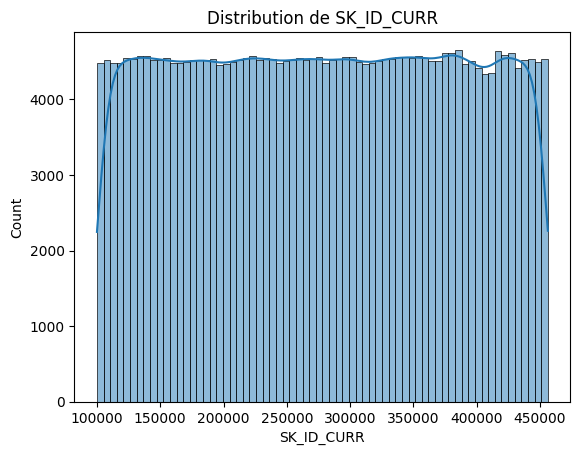

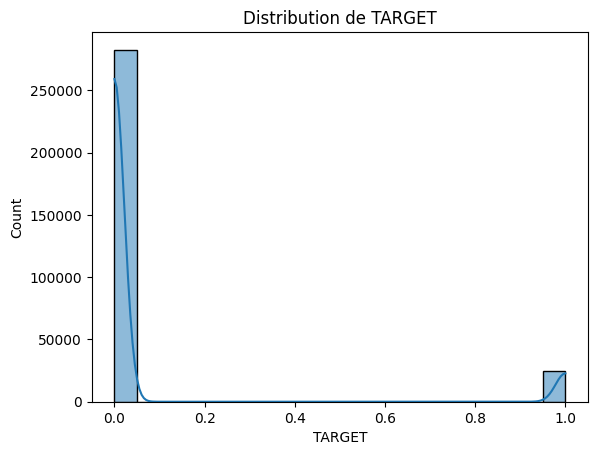

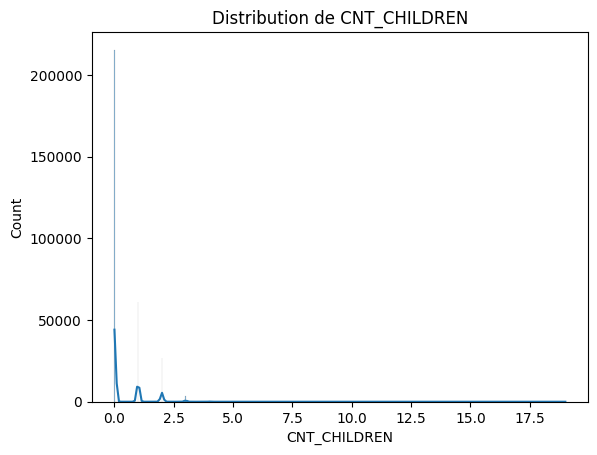

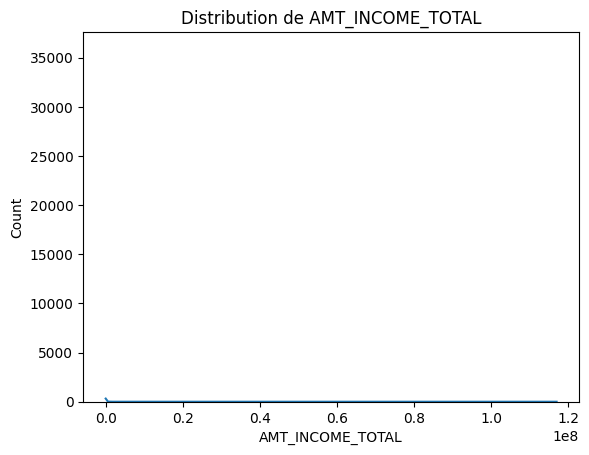

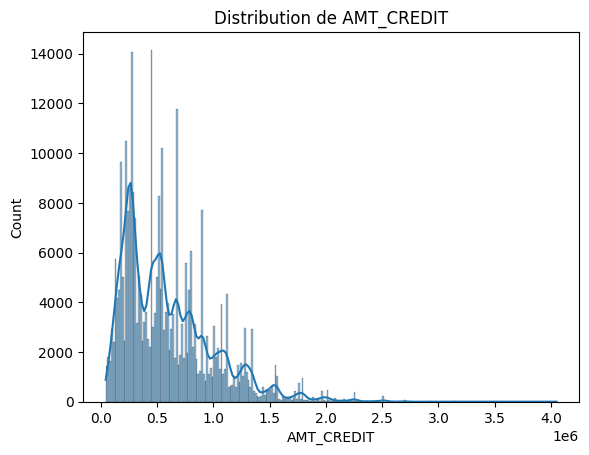

Top modalités de NAME_CONTRACT_TYPE :
NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64

Top modalités de CODE_GENDER :
CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64

Top modalités de FLAG_OWN_CAR :
FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64



In [6]:

if 'application_train' in dfs:
    app_train = dfs['application_train']
    num_cols = app_train.select_dtypes(include='number').columns
    cat_cols = app_train.select_dtypes(include='object').columns
    # Distributions numériques (top 5)
    for col in num_cols[:5]:
        plt.figure()
        sns.histplot(app_train[col].dropna(), kde=True)
        plt.title(f'Distribution de {col}')
        plt.show()
    # Top 3 des modalités pour chaque variable catégorielle (top 3 variables)
    for col in cat_cols[:3]:
        print(f"Top modalités de {col} :")
        print(app_train[col].value_counts(normalize=True).head(3))
        print()


# 7. Corrélations entre variables et avec la cible

Corrélation des variables numériques avec la cible :
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64


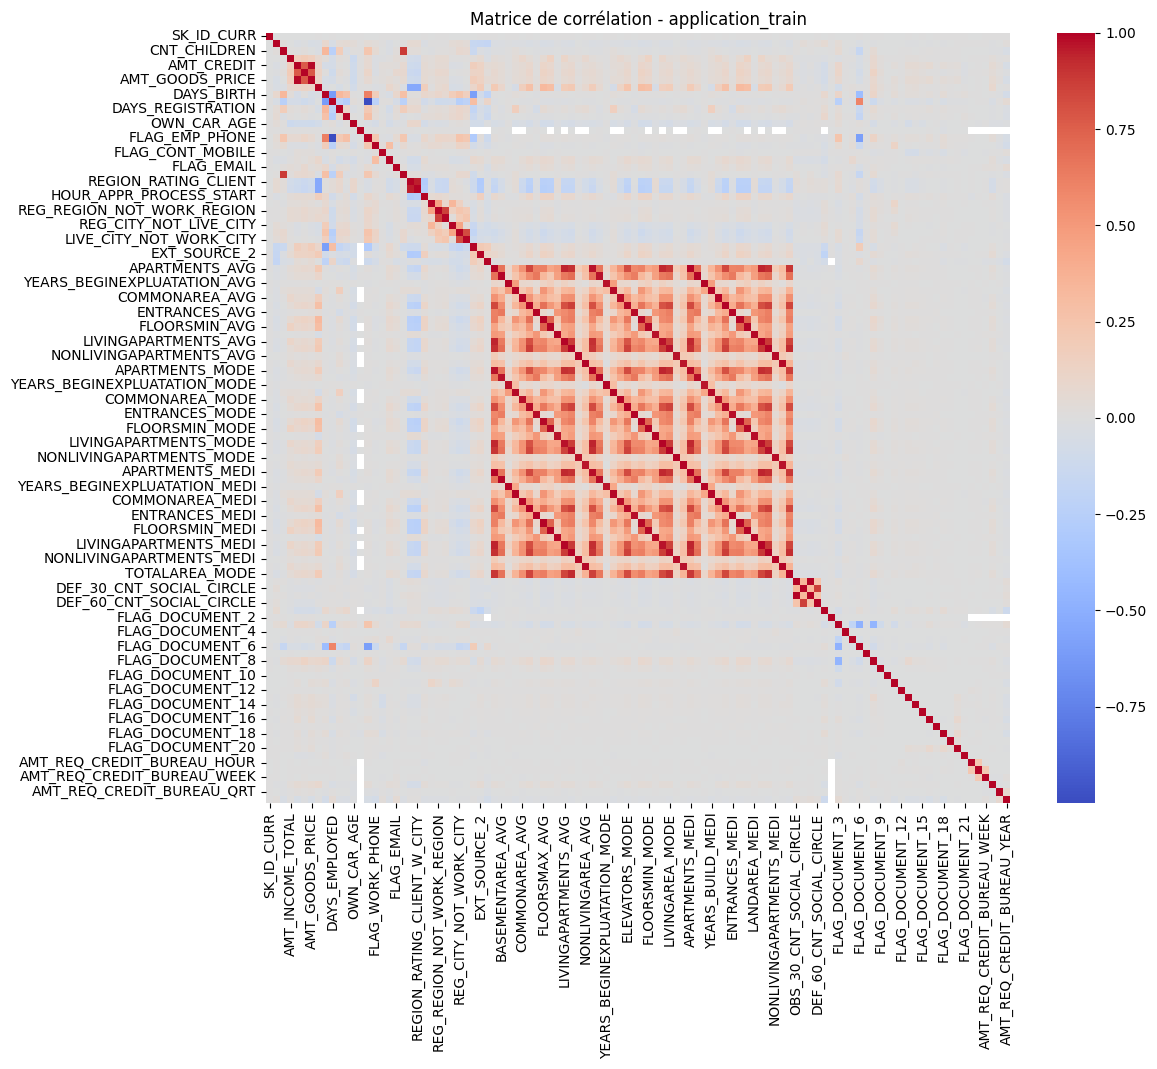

In [7]:

if 'application_train' in dfs:
    num_cols = app_train.select_dtypes(include='number').columns
    corr = app_train[num_cols].corr()
    if 'TARGET' in corr:
        print('Corrélation des variables numériques avec la cible :')
        print(corr['TARGET'].sort_values(ascending=False).head(15))
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, cmap='coolwarm', center=0)
    plt.title('Matrice de corrélation - application_train')
    plt.show()


# 8. À compléter : analyses croisées, groupby, fusions, etc.

In [8]:
# Ajoute ici des analyses spécifiques selon ta mission/scoring, par exemple :
# - groupby TARGET
# - merge application_train + previous_application
# - etc.